# Deep learning with Python

# 03. Getting started with neural networks

# 3.4 classifying movie reviews : IMDB 데이터셋

영화 리뷰의 긍정, 부정 예측

## 데이터 불러오기

In [1]:
import keras

keras.__version__

'2.4.3'

In [2]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
print("train data 0번째 데이터의 앞 10개 단어 : {}".format(train_data[0][:10]))

train_data_len = [len(element) for element in train_data[:10]]

print("train data 0 ~ 9번째 데이터의 길이 : {}".format(train_data_len))

print("train labels 0 ~ 19번째 데이터 : {}".format(train_labels[:20]))

train data 0번째 데이터의 앞 10개 단어 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
train data 0 ~ 9번째 데이터의 길이 : [218, 189, 141, 550, 147, 43, 123, 562, 233, 130]
train labels 0 ~ 19번째 데이터 : [1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


## 인덱스를 다시 단어로 변환  

In [6]:
word_index = imdb.get_word_index()

list(word_index.items())[:10]

1646592/1641221 [==============================] - 0s 0us/step


[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [7]:
# (단어, 숫자) 구조를 (숫자, 단어) 형태로 변환

reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 0 : 패딩, 1 : 문서 시작, 2 : 사전에 없음 (unknown token)을 위한 index
decoded_review = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])

# dictionary.get(key, key값이 없을때 출력할 값) : key값에 해당하는 value를 반환

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 학습 데이터 준비

In [9]:
def vectorize_sequences(sequences, dimension = 10000):
    """
    원핫인코딩을 해주는 함수
    [1, 3, 5] => [0, 1, 0, 1, 0, 1] 식으로 변환
    """
    
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.

    return result

In [10]:
# 데이터셋 변환

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
# x 데이터가 원핫인코딩 됐는지 shape로 확인

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 10000), (25000, 10000), (25000,), (25000,))

In [12]:
print(np.sum(x_train[0, :]))
print(len(train_data[0]))

# 중복되는 단어가 있어서 218개의 단어가 120개로 줄었나? : 정답!

120.0
218


In [13]:
# 결과 예시

x_train[0, :]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
# numpy 없이 고유한 값 가져와서 갯수 세기

from collections import defaultdict

# 새로운 key를 입력받았는데 값이 없다면 기본값이 0인 딕셔너리 numpy 없이 고유한 값 가져와서 갯수 세기

count_dict = defaultdict(int)

for value in train_data[0]:
    count_dict[value] += 1

# key의 개수와 value의 합으로 제대로 작동했는지 확인
print(len(list(count_dict.keys())), sum(list(count_dict.values())))

count_dict

120 218


defaultdict(int,
            {1: 1,
             2: 6,
             4: 15,
             5: 9,
             6: 3,
             7: 2,
             8: 3,
             9: 1,
             12: 6,
             13: 3,
             14: 3,
             15: 4,
             16: 11,
             17: 3,
             18: 3,
             19: 2,
             21: 1,
             22: 6,
             25: 4,
             26: 3,
             28: 2,
             30: 1,
             32: 3,
             33: 2,
             35: 1,
             36: 4,
             38: 4,
             39: 1,
             43: 4,
             46: 1,
             48: 1,
             50: 2,
             51: 2,
             52: 1,
             56: 1,
             62: 1,
             65: 2,
             66: 2,
             71: 2,
             76: 1,
             77: 1,
             82: 1,
             87: 1,
             88: 2,
             92: 1,
             98: 1,
             100: 1,
             103: 1,
             104: 2,
      

## 신경망 모델 만들기

In [15]:
from keras import models
from keras import layers

# 모델 구조 만들기
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # output이 이진분류이기 때문에 마지막 layer의 activation은 sigmoid

# compile로 모델 학습 방법 결정
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

이런식으로 클래스를 호출해서 매개변수를 변경하여 사용할 수도 있음

=> 자신만의 최적화방법이나 손실함수, 성능측정지표를 개발하여 사용할 수 있다는 의미

```
from keras import optimizers
from keras import losses
from keras import metrics

mode.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])
```

## 훈련 검증

In [16]:
# 학습용 데이터와 validation 데이터를 분리
# 학습과정 내에서 validation을 평가하여 결과에 반영

partial_x_train = x_train[:-5000]
x_val = x_train[-5000:]

partial_y_train = y_train[:-5000]
y_val = y_train[-5000:]

In [17]:
# 모델 학습

tf.random.set_seed(20152410)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
40/40 [==============================] - 3s 50ms/step - loss: 0.5414 - accuracy: 0.7376 - val_loss: 0.3275 - val_accuracy: 0.8784
Epoch 2/20
40/40 [==============================] - 1s 36ms/step - loss: 0.2577 - accuracy: 0.9130 - val_loss: 0.2878 - val_accuracy: 0.8888
Epoch 3/20
40/40 [==============================] - 1s 36ms/step - loss: 0.1932 - accuracy: 0.9325 - val_loss: 0.3194 - val_accuracy: 0.8746
Epoch 4/20
40/40 [==============================] - 1s 36ms/step - loss: 0.1556 - accuracy: 0.9483 - val_loss: 0.2836 - val_accuracy: 0.8938
Epoch 5/20
40/40 [==============================] - 1s 36ms/step - loss: 0.1218 - accuracy: 0.9600 - val_loss: 0.3192 - val_accuracy: 0.8798
Epoch 6/20
40/40 [==============================] - 1s 36ms/step - loss: 0.1023 - accuracy: 0.9680 - val_loss: 0.3199 - val_accuracy: 0.8872
Epoch 7/20
40/40 [==============================] - 1s 36ms/step - loss: 0.0844 - accuracy: 0.9734 - val_loss: 0.3603 - val_accuracy: 0.8838
Epoch 8/20
40

model.fit() 메서드는 history 객체를 반환

history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리odel.fit() 메서드는 history 객체를 반환

In [18]:
# history.history의 keys 확인

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
# 비용함수, 정확도 불러오기

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(accuracy) + 1)

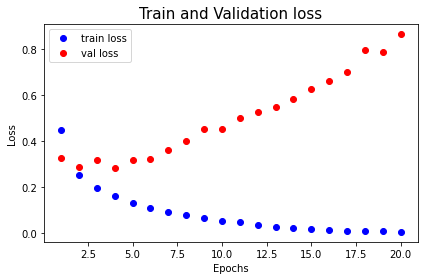

In [20]:
# train loss, validation loss 그래프 확인

plt.figure(figsize = (6, 4))
plt.plot(epochs, loss, 'bo', label = "train loss")
plt.plot(epochs, val_loss, 'ro', label = "val loss")

plt.title("Train and Validation loss", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

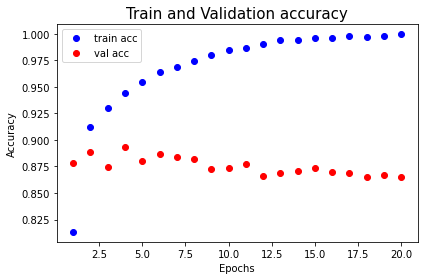

In [21]:
# train accuracy, validation accuracy 그래프 확인

plt.figure(figsize = (6, 4))
plt.plot(epochs, accuracy, 'bo', label = "train acc")
plt.plot(epochs, val_accuracy, 'ro', label = "val acc")

plt.title("Train and Validation accuracy", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

train이 적당히 학습되고, validation accuracy가 높은 epochs = 4로 최종 모델을 학습하도록 하겠습니다. 최종 모델에선 25000개 데이터 전부 사용합니다.

## 최종 모델 만들기

In [22]:
# 모델 구조 만들기
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# compile로 모델 학습 방법 결정
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [23]:
# 최종 모델 학습

tf.random.set_seed(20152410)

model.fit(x_train,
          y_train,
          epochs = 4,
          batch_size = 512)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.5324 - binary_accuracy: 0.7397
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2542 - binary_accuracy: 0.9107
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1889 - binary_accuracy: 0.9318
Epoch 4/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1521 - binary_accuracy: 0.9469


In [24]:
# predict 메서드를 이용하여 예측값 생성

model.predict(x_test[:10])

array([[0.1664933 ],
       [0.9999447 ],
       [0.9256869 ],
       [0.8653803 ],
       [0.9662573 ],
       [0.89047   ],
       [0.99978614],
       [0.00813586],
       [0.9742776 ],
       [0.9969731 ]], dtype=float32)

In [25]:
# evaluate 메서드를 활용하여 test 데이터에 대한 성능 측정

result = model.evaluate(x_test, y_test)

print("Test loss : {}, Test accuracy : {}".format(result[0], result[1]))

782/782 [==============================] - 2s 2ms/step - loss: 0.3043 - binary_accuracy: 0.8812
Test loss : 0.3043091893196106, Test accuracy : 0.8812400102615356


최종 모델의 테스트 정확도는 약 88%

layer의 개수를 추가한다거나, layer의 node 수를 변경한다는 등 모델의 구조를 바꿔 성능을 높힐 수 있다!

# 3.5 다중 분류 문제 : 로이터 데이터셋을 이용한 뉴스 기사 분류

## 데이터 불러오기

In [26]:
# 데이터 다운로드

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


이번에도 빈도수가 높은 단어 10000개만 사용

In [27]:
# 데이터 형태 확인

print("train data shape :", train_data.shape)
print("train labels shape :", train_labels.shape)
print("test data shape :", test_data.shape)
print("test labels shape :", test_labels.shape)

train data shape : (8982,)
train labels shape : (8982,)
test data shape : (2246,)
test labels shape : (2246,)


In [28]:
# data의 예시 데이터 출력
# 1차원 array인데 각 원소가 list인 train_data

train_data[0:2]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])],
      dtype=object)

In [29]:
# 디코딩해서 정수 인덱스를 다시 단어로 변환

word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 제외해야하는 토큰 : 0 - 패딩, 1 - 문서 시작, 2 - 사전에 없음

decoded_newswire_0 = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [30]:
decoded_newswire_0

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [31]:
# labels의 예시 데이터 출력

train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

## 데이터 준비

원래 텍스트 데이터는 원핫인코딩도 순서를 고려하는 것으로 알고 있는데 책 초반의 예제라 그런지 순서는 고려하지 않는 듯

- 원핫 인코딩 예시

[1, 3, 5] => [0, 1, 0, 1, 0, 1]

- 순서를 고려한 원핫 인코딩 예시

[1, 3, 5] => [[0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1]]

In [32]:
# 원핫인코딩

import numpy as np

def onehotencoding(sequences, dimension):
    
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.

    return result

In [33]:
# train과 test의 학습용 데이터 생성

onehot_x_train = onehotencoding(train_data, dimension = 10000)
onehot_x_test = onehotencoding(test_data, dimension = 10000)

onehot_y_train = onehotencoding(train_labels, dimension = 46)
onehot_y_test = onehotencoding(test_labels, dimension = 46)

In [34]:
# 케라스의 내장 함수를 이용하는 방법도 있음

from keras.utils.np_utils import to_categorical

## 데이터 홀드아웃 및 모델 학습

In [35]:
from keras import models
from keras import layers

def build_model():

    model = models.Sequential()
    model.add(layers.Dense(128, activation = 'relu', input_shape = (10000, )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(46, activation = 'softmax'))
    # 다중분류 문제에서 마지막 layer의 activation은 softmax로 지정

    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model

In [36]:
# train 데이터를 train과 validation으로 분할

x_train = onehot_x_train[:-1000]
x_val = onehot_x_train[-1000:]

y_train = onehot_y_train[:-1000]
y_val = onehot_y_train[-1000:]

# 모델 객체 생성

model_train = build_model()

In [37]:
import tensorflow as tf

tf.random.set_seed(20152410)

history = model_train.fit(x_train,
                          y_train,
                          epochs = 20,
                          batch_size = 512,
                          validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 90ms/step - loss: 2.8847 - accuracy: 0.3876 - val_loss: 1.5429 - val_accuracy: 0.7180
Epoch 2/20
16/16 [==============================] - 1s 75ms/step - loss: 1.2535 - accuracy: 0.7511 - val_loss: 1.2405 - val_accuracy: 0.7470
Epoch 3/20
16/16 [==============================] - 1s 76ms/step - loss: 0.8550 - accuracy: 0.8268 - val_loss: 1.1012 - val_accuracy: 0.7740
Epoch 4/20
16/16 [==============================] - 1s 76ms/step - loss: 0.6159 - accuracy: 0.8754 - val_loss: 1.0383 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 75ms/step - loss: 0.4646 - accuracy: 0.9024 - val_loss: 0.9836 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 75ms/step - loss: 0.3394 - accuracy: 0.9312 - val_loss: 0.9620 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 0.2740 - accuracy: 0.9421 - val_loss: 0.9732 - val_accuracy: 0.7870
Epoch 8/20
16

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = list(range(1, len(loss) + 1))

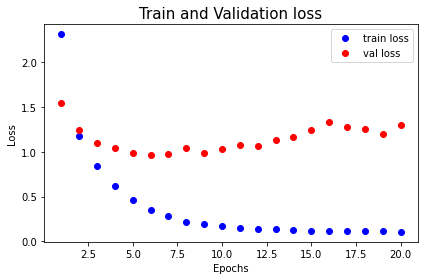

In [39]:
# train loss, validation loss 그래프 확인

plt.figure(figsize = (6, 4))
plt.plot(epochs, loss, 'bo', label = "train loss")
plt.plot(epochs, val_loss, 'ro', label = "val loss")

plt.title("Train and Validation loss", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

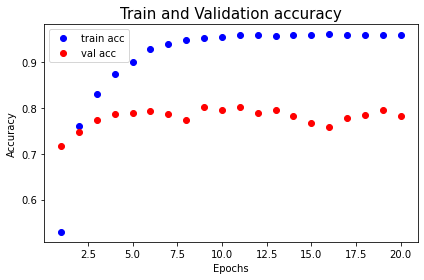

In [40]:
# train accuracy, validation accuracy 그래프 확인

plt.figure(figsize = (6, 4))
plt.plot(epochs, accuracy, 'bo', label = "train acc")
plt.plot(epochs, val_accuracy, 'ro', label = "val acc")

plt.title("Train and Validation accuracy", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
print("validation loss가 가장 낮았던 시점 : {}".format(np.argmin(val_loss)))
print("validation accuracy가 가장 높았던 시점 : {}".format(np.argmax(val_accuracy)))

print("validation loss의 최솟값 : {}".format(np.min(val_loss)))
print("validation accuracy의 최댓값 : {}".format(np.max(val_accuracy)))

validation loss가 가장 낮았던 시점 : 5
validation accuracy가 가장 높았던 시점 : 8
validation loss의 최솟값 : 0.9619527459144592
validation accuracy의 최댓값 : 0.8029999732971191


validation accuracy가 약 80%로 가장 높았던 epochs = 8로 최종 모델을 학습하도록 하겠습니다.

## 최종 모델 학습

In [42]:
model_final = build_model()

train과 validation을 합쳐서 모델을 학습한 뒤 test 데이터로 성능을 평가해보도록 하겠습니다.

In [43]:
model_final.fit(onehot_x_train,
                onehot_y_train,
                epochs = 8,
                batch_size = 512)

Epoch 1/8
18/18 [==============================] - 2s 72ms/step - loss: 2.7987 - accuracy: 0.4191
Epoch 2/8
18/18 [==============================] - 1s 70ms/step - loss: 1.1529 - accuracy: 0.7694
Epoch 3/8
18/18 [==============================] - 1s 69ms/step - loss: 0.8191 - accuracy: 0.8316
Epoch 4/8
18/18 [==============================] - 1s 69ms/step - loss: 0.6017 - accuracy: 0.8797
Epoch 5/8
18/18 [==============================] - 1s 68ms/step - loss: 0.4524 - accuracy: 0.9056
Epoch 6/8
18/18 [==============================] - 1s 70ms/step - loss: 0.3282 - accuracy: 0.9301
Epoch 7/8
18/18 [==============================] - 1s 68ms/step - loss: 0.2453 - accuracy: 0.9482
Epoch 8/8
18/18 [==============================] - 1s 68ms/step - loss: 0.2170 - accuracy: 0.9469


In [44]:
result = model_final.evaluate(onehot_x_test, onehot_y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9748 - accuracy: 0.7961


In [45]:
print("최종 모델의 loss : {}".format(result[0]))
print("최종 모델의 accuracy : {}%".format(round(100*result[1], 2)))

최종 모델의 loss : 0.9747899174690247
최종 모델의 accuracy : 79.61%


## 새로운 데이터에 대해 예측하기

In [46]:
pred_test = model_final.predict(onehot_x_test)

In [47]:
pred_test[0]

array([4.07958723e-05, 6.10449424e-05, 5.00613578e-06, 9.41546917e-01,
       4.96349037e-02, 1.65864898e-04, 4.54346737e-05, 1.96495671e-06,
       3.22761014e-03, 4.95151580e-05, 4.41499542e-05, 1.02497113e-03,
       7.96587046e-05, 3.54250442e-05, 8.86256385e-06, 1.30036278e-05,
       3.45726410e-04, 1.23452788e-04, 7.18744468e-06, 1.27397897e-03,
       4.70250903e-04, 1.93189728e-04, 5.89020674e-05, 2.92513141e-04,
       6.24473296e-06, 7.84231888e-05, 1.35352448e-05, 2.07525281e-05,
       1.91042545e-05, 4.84869270e-05, 1.33024267e-04, 1.26383939e-05,
       2.80006316e-06, 1.00433945e-05, 1.96100897e-04, 2.11605638e-05,
       1.69083884e-04, 3.17737358e-05, 1.57790801e-05, 2.17708017e-04,
       7.23645935e-05, 1.93836113e-05, 1.28628555e-04, 3.17878912e-05,
       2.24648566e-08, 6.70239103e-07], dtype=float32)

In [48]:
np.sum(pred_test[0]), np.argmax(pred_test[0])

(0.9999997, 3)

각 클래스라고 예측할 확률을 다 더하면 1

그 중에서 가장 높은 값을 가진 index로 예측

labels를 onehot encoding 한 경우에는 손실 함수로 categorical_crossentropy를 사용하면 되고,

labels를 onehot encoding 하지 않고 그대로 사용하고 싶은 경우 손실함수로 sparse_categorical_crossentropy를 사용하면 된다

은닉층은 출력층보다 충분히 넓어야 한다. 만약 출력층보다 은닉층이 작다면 그 은닉층에서 정보의 병목 현상이 일어나게 된다.

=> n-1번째 은닉층은 n번째 은닉층보다 넓은게 n-1번째 은닉층에서의 정보 병목 현상을 방지하는데 좋다.

# 3.6 회귀 문제 : 보스턴 주택 가격 데이터셋을 이용한 가격 예측

## 데이터 불러오기

In [49]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [50]:
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(train_targets.shape)

(404, 13)
(404,)
(102, 13)
(404,)


In [51]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [52]:
train_targets[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

변수 특성은 다음과 같습니다.

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

타깃은 주택의 중간 가격으로 천달러 단위입니다

## 데이터 준비

변수의 스케일이 다르기 때문에 표준화 or 정규화 등의 방법을 이용해 스케일을 맞춰준다

In [53]:
# 표준화 class 생성

class Scaler:

    def __init__(self):
        self.mean = 0
        self.std = 0

    def fit(self, data):
        self.mean = np.mean(data, axis = 0)
        self.std = np.std(data, axis = 0)

    def transform(self, data):
        result = (data - self.mean) / self.std
        return result

    def invernse_transform(self, data):
        result = data * self.std + self.mean
        return result

In [54]:
# data와 target을 각각 표준화해준다.

x_scaler = Scaler()

x_scaler.fit(train_data)

std_train_data = x_scaler.transform(train_data)
std_test_data = x_scaler.transform(test_data)


y_scaler = Scaler()

y_scaler.fit(train_targets)

std_train_targets = y_scaler.transform(train_targets)
std_test_targets = y_scaler.transform(test_targets)

In [55]:
std_train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

## 모델 구성 및 교차 검증

In [56]:
import tensorflow as tf
from keras import models, layers

def build_model():

    tf.random.set_seed(20152410)
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer = 'rmsprop',
                  loss = 'mse',
                  metrics = ['mae'])
    
    return model

In [57]:
def cross_validation_model(train_data, train_targets, cv, epochs):

    k = cv
    n = train_data.shape[0]
    num_val_samples = n // 4
    num_epochs = epochs
    history_record = []

    for i in range(k):
        print("처리중인 폴드 : {}".format(i))

        # train과 validation의 인덱스 구성
        train_sample0 = np.arange(0, i * num_val_samples)
        train_sample1 = np.arange((i + 1) * num_val_samples, n)
        train_samples = np.concatenate([train_sample0, train_sample1])
        val_samples = np.arange(i * num_val_samples, (i + 1) * num_val_samples)
        
        # train과 validation 구성
        x_train = train_data[train_samples]
        y_train = train_targets[train_samples]
        x_val = train_data[val_samples]
        y_val = train_targets[val_samples]

        # 모델 학습
        model = build_model()
        history = model.fit(x_train,
                            y_train,
                            epochs = num_epochs,
                            verbose = 0,
                            validation_data = (x_val, y_val))
        
        history_record.append(history.history)

    return history_record

In [58]:
# epochs를 500으로 지정해서 학습 후 history 확인을 통해 epochs 결정

history_record = cross_validation_model(train_data = std_train_data,
                                        train_targets = std_train_targets,
                                        cv = 4,
                                        epochs = 500)

처리중인 폴드 : 0
처리중인 폴드 : 1
처리중인 폴드 : 2
처리중인 폴드 : 3


In [59]:
def cv_result(history, keys):

    n = len(history)
    result = np.zeros((len(history[0][keys]), ))
    
    for i in range(n):
        result += np.array(history[i][keys])

    result = result / n
    return result

In [60]:
cv_loss = cv_result(history_record, keys = "loss")
cv_mae = cv_result(history_record, keys = "mae")
cv_val_loss = cv_result(history_record, keys = "val_loss")
cv_val_mae = cv_result(history_record, keys = "val_mae")

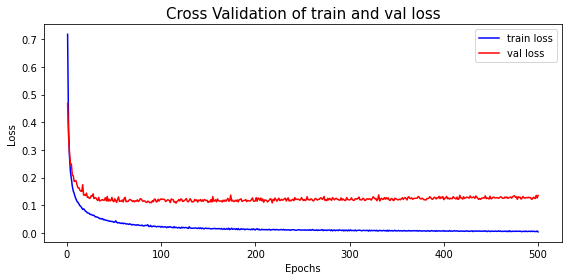

In [61]:
# train loss, validation loss 그래프 확인

epochs = np.arange(1, 501)

plt.figure(figsize = (8, 4))
plt.plot(epochs, cv_loss, 'b-', label = "train loss", markersize = 3)
plt.plot(epochs, cv_val_loss, 'r-', label = "val loss", markersize = 3)

plt.title("Cross Validation of train and val loss", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

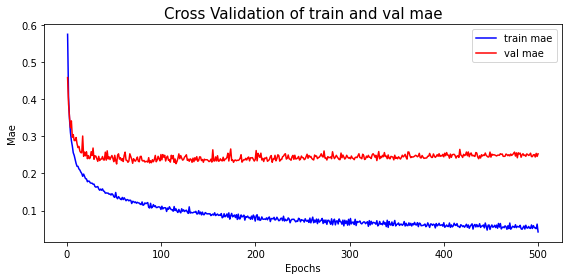

In [62]:
# train loss, validation loss 그래프 확인

epochs = np.arange(1, 501)

plt.figure(figsize = (8, 4))
plt.plot(epochs, cv_mae, 'b-', label = "train mae", markersize = 3)
plt.plot(epochs, cv_val_mae, 'r-', label = "val mae", markersize = 3)

plt.title("Cross Validation of train and val mae", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Mae')
plt.legend()

plt.tight_layout()
plt.show()

40 ~ 60 정도만 되도 validation loss와 validation mae는 더 이상 감소하지 않는 것을 확인할 수 있다.

In [63]:
np.argmin(cv_val_mae)

52

52번째 epochs에서 cv validation mae가 가장 작은 값을 기록한다. 따라서 epochs = 52로 최종 모델을 학습하고 난 후 target을 원래의 스케일로 바꿔준 뒤 최종 모델의 성능 평가를 진행하도록 하겠다.

## 최종 모델 학습 및 결과 평가

In [64]:
model = build_model()

# cv 결과로 가장 적합하다고 평가받았던 epochs = 52를 이용하여 모델 학습

model.fit(std_train_data,
          std_train_targets,
          epochs = 52)

result = model.evaluate(std_test_data, std_test_targets)

Epoch 1/52
13/13 [==============================] - 1s 1ms/step - loss: 0.7137 - mae: 0.5798
Epoch 2/52
13/13 [==============================] - 0s 2ms/step - loss: 0.3115 - mae: 0.3640
Epoch 3/52
13/13 [==============================] - 0s 2ms/step - loss: 0.2677 - mae: 0.3430
Epoch 4/52
13/13 [==============================] - 0s 1ms/step - loss: 0.2382 - mae: 0.3054
Epoch 5/52
13/13 [==============================] - 0s 1ms/step - loss: 0.2354 - mae: 0.2931
Epoch 6/52
13/13 [==============================] - 0s 2ms/step - loss: 0.1759 - mae: 0.2586
Epoch 7/52
13/13 [==============================] - 0s 2ms/step - loss: 0.1216 - mae: 0.2272
Epoch 8/52
13/13 [==============================] - 0s 2ms/step - loss: 0.1550 - mae: 0.2461
Epoch 9/52
13/13 [==============================] - 0s 2ms/step - loss: 0.1235 - mae: 0.2367
Epoch 10/52
13/13 [==============================] - 0s 1ms/step - loss: 0.1280 - mae: 0.2305
Epoch 11/52
13/13 [==============================] - 0s 1ms/step - lo

In [65]:
print("최종 모델의 표준화된 test target에 대한 mse : {}".format(result[0]))
print("최종 모델의 표준화된 test target에 대한 mae : {}".format(result[1]))

pred_std_y_test = model.predict(std_test_data)
pred_y_test = y_scaler.invernse_transform(pred_std_y_test).reshape(-1)

test_mse = np.mean((test_targets - pred_y_test)**2)
test_mae = np.mean(np.abs(test_targets - pred_y_test))

print("최종 모델의 test mse : {}".format(test_mse))
print("최종 모델의 test mse : {}".format(test_mae))

최종 모델의 표준화된 test target에 대한 mse : 0.18589599430561066
최종 모델의 표준화된 test target에 대한 mae : 0.28617045283317566
최종 모델의 test mse : 15.73093703001637
최종 모델의 test mse : 2.6324919775420548
